In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_geran_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Geraniol
0,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.0
1,4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,11,0.260672,-0.019644,0.215790,-0.106098,0.058930,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0.0
3,12,0.301049,-0.056156,-0.030174,-0.036708,0.015147,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.0
4,21,0.412179,-0.004705,-0.130429,0.000645,-0.119390,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,42970,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
44996,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
44997,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
44998,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..Geraniol', 'index'], axis = 1)
y = df_knn[['X..Geraniol']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

<AxesSubplot:ylabel='Count'>

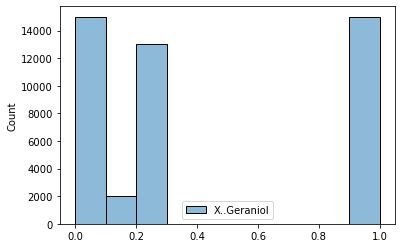

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.045757185185185165

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.02854962706172839

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.16896634890334936

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9076461270283398

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.8457138347580717

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([1.06834056e-01, 1.04813032e-01, 1.30375013e-01, 9.39272342e-02,
       1.02363347e-01, 1.67205825e-01, 2.17715217e-07, 2.12550028e-07,
       2.59063373e-04, 2.48996581e-03, 4.13589797e-03, 0.00000000e+00,
       7.65325376e-03, 2.15455922e-04, 8.74848123e-03, 5.49435732e-03,
       7.14412842e-03, 8.51498582e-03, 7.17036110e-21, 8.33795578e-03,
       0.00000000e+00, 7.91017759e-20, 8.17250384e-03, 4.17054321e-03,
       6.64099483e-03, 2.76601775e-03, 6.39605733e-03, 2.43597995e-04,
       0.00000000e+00, 3.58504605e-03, 9.85221553e-03, 5.29182673e-06,
       7.35858403e-03, 0.00000000e+00, 0.00000000e+00, 8.17403758e-03,
       4.06718379e-03, 6.20207227e-03, 1.34960828e-04, 8.25832160e-05,
       3.04725314e-05, 5.47644663e-03, 1.39539110e-04, 2.88177210e-03,
       6.36028105e-04, 6.07274843e-03, 3.23011432e-04, 1.74401050e-05,
       1.52716503e-02, 1.12156106e-04, 2.63034035e-02, 6.36606985e-03,
       3.99833633e-03, 1.54971998e-03, 2.72920105e-03, 1.38265727e-03,
      

In [19]:
selector.threshold_

0.01162790697674419

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,citrus,diesel,orange,sweet
0,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,0
1,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,0
2,0.260672,-0.019644,0.215790,-0.106098,0.058930,1,0,0,0,1
3,0.301049,-0.056156,-0.030174,-0.036708,0.015147,1,0,0,0,1
4,0.412179,-0.004705,-0.130429,0.000645,-0.119390,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
44995,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,0,0,0,0
44996,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,0,0,0,0
44997,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0
44998,0.324915,0.131823,-0.099424,0.065491,0.038437,0,0,0,0,0


In [24]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'citrus',
 'diesel',
 'orange',
 'sweet']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_geran.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_geran.pkl")

['selector_knn_lsa_elbow_geran.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.04185185185185183

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.024791588916323725

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.15745344999816208

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9150829275535172

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.8658531018223765

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [54]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [55]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.033341631221505796

In [56]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.14207351965729015

In [57]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9796232216683852

In [58]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8907799044133082

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [59]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [60]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_geran.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_geran.pkl")

['y_test_knreg_lsa_elbow_geran.pkl']

In [61]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.03333648789497159

In [62]:
mean_squared_error(y_test, y_pred_knreg_test)

0.02079870075871536

In [63]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.14421754663949654

In [64]:
r2_score(y_test, y_pred_knreg_test)

0.8869953338021246

In [65]:
y_test

,X..Geraniol
25275,0.000000
12561,1.000000
24707,0.000000
25066,0.000000
33429,0.222222
...,...
15262,1.000000
36801,0.222222
44919,0.000000
38317,0.222222


In [66]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

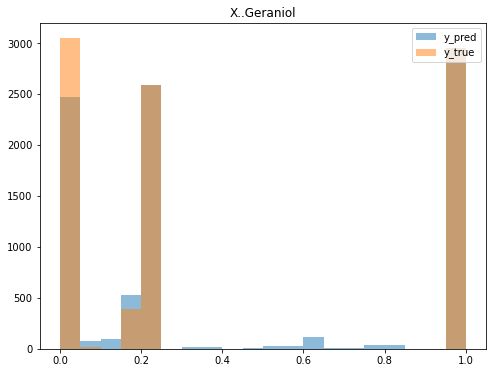

<Figure size 432x288 with 0 Axes>

In [67]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Geraniol"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_geran.png')

Pearson R

In [68]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.944
P-value: 0.000


<AxesSubplot:>

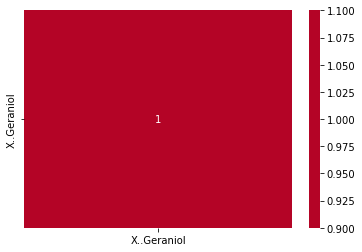

In [69]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)